https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

Import Libraries

In [296]:
# For generating random variables/numerical arrays
import numpy as np

# For handling data in dataframes
import pandas as pd

# For plotting
import matplotlib.pyplot as plt

# For plotting
import seaborn as sns

# For stats and ANOVA
import scipy.stats as stats

# For stats and ANOVA
import scipy.stats as ss

#
import statsmodels.api as sm
#
from statsmodels.formula.api import ols

#
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

# Collections.
import collections as co

# Specials.
import scipy.special as spec


# 
from statsmodels.stats.anova import anova_lm

# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency


from scipy.stats import shapiro

# Import Dataset

Diet.csv contains information on seventy-eight (78) people who undertook three (3) diets. There is background information such as age, gender and height, and weight loss while on a diet (a positive value means they lost weight). 

The study aimed to see which diet was best for losing weight. The study also posited that the gender of the participant influenced the effectiveness of each diet.

In [297]:
df = pd.read_csv('https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv')

In [298]:
df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


In [299]:
print('This dataset contains {} rows'.format(data.size))

This dataset contains 624 rows


**Assumption 1: Dependant Variable**

In [300]:
df["weight_loss"] = df['pre.weight'] - df["weight6weeks"]

In [301]:
df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weight_loss
0,25,,41,171,60,2,60.0,0.0
1,26,,32,174,103,2,103.0,0.0
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7


In [302]:
# Dependant Variable
dependent = df['weight_loss']
dependent

0     0.0
1     0.0
2     3.8
3     6.0
4     0.7
     ... 
73    2.8
74    4.1
75    5.3
76    9.2
77    6.1
Name: weight_loss, Length: 78, dtype: float64

In [303]:
dependent.describe()

count    78.000000
mean      3.844872
std       2.551478
min      -2.100000
25%       2.000000
50%       3.600000
75%       5.550000
max       9.200000
Name: weight_loss, dtype: float64

In [304]:
# See if there are any missing value in Dependant Variable column
df.weight_loss.isnull().sum()

0

C:\Users\sgibbons\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Weight Loss Distributions'}, xlabel='weight_loss', ylabel='pdf'>

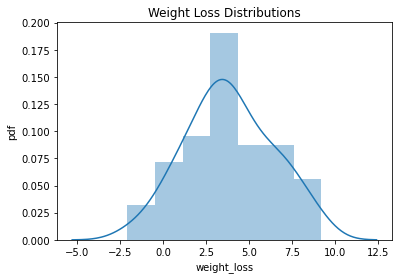

In [305]:
plt.title('Weight Loss Distributions')
plt.ylabel('pdf')
sns.distplot(df.weight_loss)

**Assumption 2: Independent Variables**

Independent Variable 1

In [306]:
# Independent Variable 1
independent_1 = df['Diet']
independent_1

0     2
1     2
2     1
3     1
4     1
     ..
73    3
74    3
75    3
76    3
77    3
Name: Diet, Length: 78, dtype: int64

In [307]:
independent_1.describe()

count    78.000000
mean      2.038462
std       0.812920
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: Diet, dtype: float64

In [308]:
independent_1.unique()

array([2, 1, 3], dtype=int64)

In [309]:
# See if there are any missing value the first Independant Variable column
independent_1.isnull().sum()

0

C:\Users\sgibbons\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sgibbons\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sgibbons\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

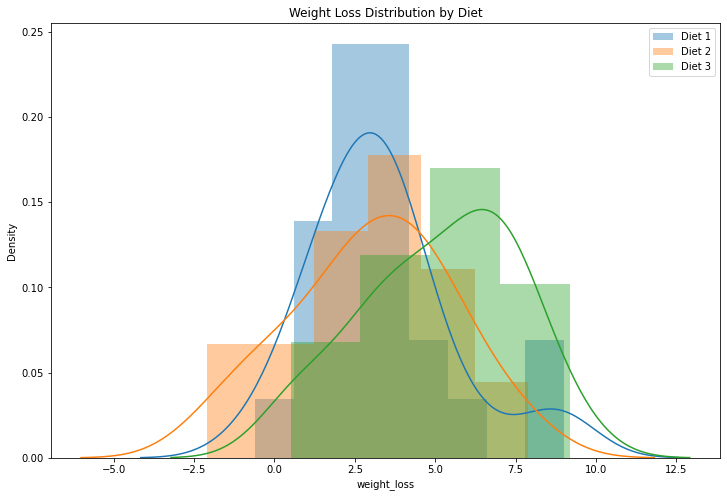

In [310]:
f, ax = plt.subplots(figsize=(12,8))
sns.distplot(df[independent_1 == 1].weight_loss, ax=ax, label='Diet 1')
sns.distplot(df[independent_1 == 2].weight_loss, ax=ax, label='Diet 2')
sns.distplot(df[independent_1 == 3].weight_loss, ax=ax, label='Diet 3')
plt.title('Weight Loss Distribution by Diet')
plt.legend()

In [311]:
df.groupby(independent_1).agg([np.mean, np.median, np.count_nonzero, np.std]).weight_loss

,mean,median,count_nonzero,std
Diet,,,,
1,3.300000,3.05,24.0,2.240148
2,3.025926,3.30,25.0,2.523367
3,5.148148,5.40,27.0,2.395568


Independent Variable 2

In [312]:
# Independent Variable
independent_2 = df['gender']
independent_2

0      
1      
2     0
3     0
4     0
     ..
73    1
74    1
75    1
76    1
77    1
Name: gender, Length: 78, dtype: object

In [313]:
independent_2.describe()

count     78
unique     3
top        0
freq      43
Name: gender, dtype: object

In [314]:
independent_2.unique()

array([' ', '0', '1'], dtype=object)

In [315]:
# Show where the missing values in the second Independant Variable column are
df[independent_2 == ' ']

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weight_loss
0,25,,41,171,60,2,60.0,0.0
1,26,,32,174,103,2,103.0,0.0


C:\Users\sgibbons\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sgibbons\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


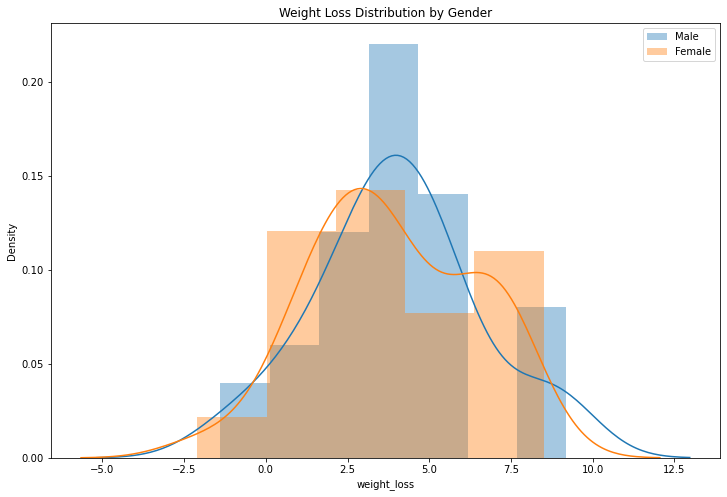

In [316]:
f, ax = plt.subplots(figsize=(12,8))
sns.distplot(df[independent_2 == '1'].weight_loss, ax=ax, label='Male')
sns.distplot(df[independent_2 == '0'].weight_loss, ax=ax, label='Female')
plt.title('Weight Loss Distribution by Gender')
plt.legend()

In [317]:
df.groupby(independent_2).agg([np.mean, np.median, np.count_nonzero, np.std]).weight_loss

,mean,median,count_nonzero,std
gender,,,,
,0.000000,0.0,0.0,0.000000
0,3.893023,3.6,43.0,2.515892
1,4.015152,4.1,33.0,2.529837


**Assumption 3: Independence of Observations**

Diet was blindly assigned to people regardless of gender.

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

https://medium.com/swlh/how-to-run-chi-square-test-in-python-4e9f5d10249d

In [318]:
contigency= pd.crosstab(df['Diet'], df['gender'])  
contigency

gender,,0,1
Diet,,,
1,0,14,10
2,2,14,11
3,0,15,12


In [319]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

0.41651218949783186


**Assumption 4: Outliers**

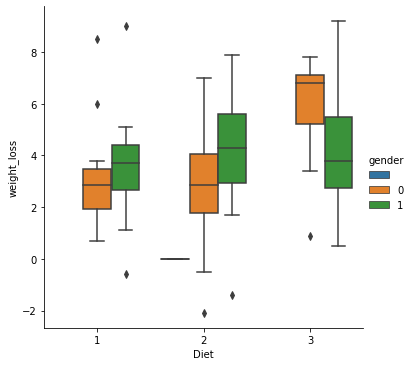

In [320]:
sns.catplot(x="Diet", y="weight_loss", hue='gender', kind="box", data=df)
plt.show()

**Assumption 5: Normality of Distribution**

Shapiro Wilks Test

In [321]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.975271463394165 0.13302740454673767


All the distributions for the dependent variable has a p-value greater than 0.05 suggesting it is normally distributed.

**Assumption 6: Homogeneity of Variances**

Assess the equality of variance between two different samples

https://www.geeksforgeeks.org/levenes-test/



In [322]:
df.groupby(['gender', 'Diet']).agg([np.mean, np.median, np.count_nonzero, np.std]).weight_loss

mean  median  count_nonzero       std
gender Diet                                           
       2     0.000000    0.00            0.0  0.000000
0      1     3.050000    2.85           14.0  2.065001
       2     2.607143    2.85           14.0  2.288925
       3     5.880000    6.80           15.0  1.889520
1      1     3.650000    3.70           10.0  2.536073
       2     4.109091    4.30           11.0  2.525254
       3     4.233333    3.80           12.0  2.716058

Levene's Test

**Anova Test**

Two-Way

https://www.marsja.se/three-ways-to-carry-out-2-way-anova-with-python/

ANOVA with both 'gender' and 'Diet' variables with respect to the variable 'weight_loss'.

In [323]:
model = ols('weight_loss ~ C(Diet) + C(gender) + C(Diet):C(gender)', data).fit()
anova_table = anova_lm(model)
print(anova_table)

                     df      sum_sq    mean_sq         F    PR(>F)
C(Diet)             2.0   71.093689  35.546845  6.706434  0.002149
C(gender)           2.0   19.946148   9.973074  1.881567  0.159869
C(Diet):C(gender)   4.0   41.814932  10.453733  1.972250  0.108045
Residual           71.0  376.329043   5.300409       NaN       NaN


In [324]:
sns.displot(x = "Diet", y = "weight_loss", linestyles = '-.', markers = '^', hue = "gender", kind == "kde", data = df) 


plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-324-b318e478d831>, line 1)

## References

***
# End